In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

import os
plt.rc("font",family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [4]:
#농수축산물 가격 Data load
df_raw = pd.read_csv("C:/Users/sksya/Downloads/돈육대표가격_2020년.csv",encoding="CP949")
df_raw.info()
df_raw.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   발표일자      88 non-null     object
 1   대표가격(원)   88 non-null     object
 2   거래두수(두)   88 non-null     object
 3   거래대금(천원)  88 non-null     object
 4   거래중량(kg)  88 non-null     object
 5   농협
음성     88 non-null     object
 6   안양
협신     87 non-null     object
 7   도드람       88 non-null     object
 8   부경
축공     88 non-null     object
 9   대구
신흥     88 non-null     object
 10  인천
삼성     88 non-null     object
 11  제주
축공     88 non-null     object
 12  농협
부천     2 non-null      object
 13  농협
고령     87 non-null     object
 14  농협
나주     88 non-null     object
 15  김해
축공     88 non-null     object
dtypes: object(16)
memory usage: 11.1+ KB


Index(['발표일자', '대표가격(원)', '거래두수(두)', '거래대금(천원)', '거래중량(kg)', '농협\n음성',
       '안양\n협신', '도드람', '부경\n축공', '대구\n신흥', '인천\n삼성', '제주\n축공', '농협\n부천',
       '농협\n고령', '농협\n나주', '김해\n축공'],
      dtype='object')

In [9]:
df_raw.columns = df_raw.columns.str.replace("\n","")

In [16]:
df_raw["발표월"] = df_raw["발표일자"].map(lambda x : str(x).split('-')[1])
df_temp = df_raw["발표일자"].map(lambda x : str(x).split('-')[2])
df_raw["발표일"] = df_temp.map(lambda x: str(x).split('(')[0])

In [22]:
df_raw = df_raw.drop("농협부천",axis=1)

In [24]:
df_raw["대표가격"] = df_raw["대표가격(원)"].map(lambda x : str(x).split()[0])
df_raw

,발표일자,대표가격(원),거래두수(두),거래대금(천원),거래중량(kg),농협음성,안양협신,도드람,부경축공,대구신흥,인천삼성,제주축공,농협고령,농협나주,김해축공,발표월,발표일,대표가격
0,2020-05-01(금),4826 ↓13,"5,243","2,152,590.80","446,029","6,069","5,474","5,347","4,691","4,578","5,393","4,352","4,763","4,545","4,753",05,01,4826
1,2020-04-30(목),4839 ↓66,"9,445","3,863,002.87","798,317","5,596","5,568","5,206","4,736","4,598","5,582","4,699","4,601","4,710","4,512",04,30,4839
2,2020-04-29(수),4905 ↑51,"9,007","3,744,239.17","763,342","5,011","5,699","5,040","4,561","4,648","5,465","5,220","4,459","4,778","4,283",04,29,4905
3,2020-04-28(화),4854 ↑109,"7,856","3,259,172.08","671,508","4,869","5,628","4,974","4,353","4,469","5,216","5,386","4,409","4,515","4,215",04,28,4854
4,2020-04-27(월),4745 ↑23,"7,440","3,028,081.50","638,159","4,950","5,413","4,917","4,167","4,206","5,182","5,305","4,417","4,540","4,164",04,27,4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-01-07(화),3375 ↑83,"7,995","2,336,908.85","692,335","3,178","3,137","3,160","2,781","3,110","2,977","4,543","3,067","2,613","2,869",01,07,3375
84,2020-01-06(월),3292 ↑69,"8,337","2,377,958.56","722,342","2,855","3,133","3,111","2,741","2,727","3,051","4,334","2,924","2,356","3,005",01,06,3292
85,2020-01-03(금),3223 ↑15,"8,744","2,441,305.96","757,461","2,758","3,173","2,987","2,772","2,636","3,034","4,301","2,800","2,299","3,062",01,03,3223
86,2020-01-02(목),3208 -,"9,083","2,519,623.36","785,415","2,689","3,390","3,044","2,779","2,626","3,191","4,271","2,718","2,299","3,109",01,02,3208


In [69]:
df_raw["발표월"] = df_raw["발표월"].astype(int)
df_raw["발표일"] = df_raw["발표일"].astype(int)
df_raw["대표가격"] = df_raw["대표가격"].astype(int)

In [80]:
df_raw["도드람"] = df_raw["도드람"].map(lambda x : x.replace(',','')).astype(int)

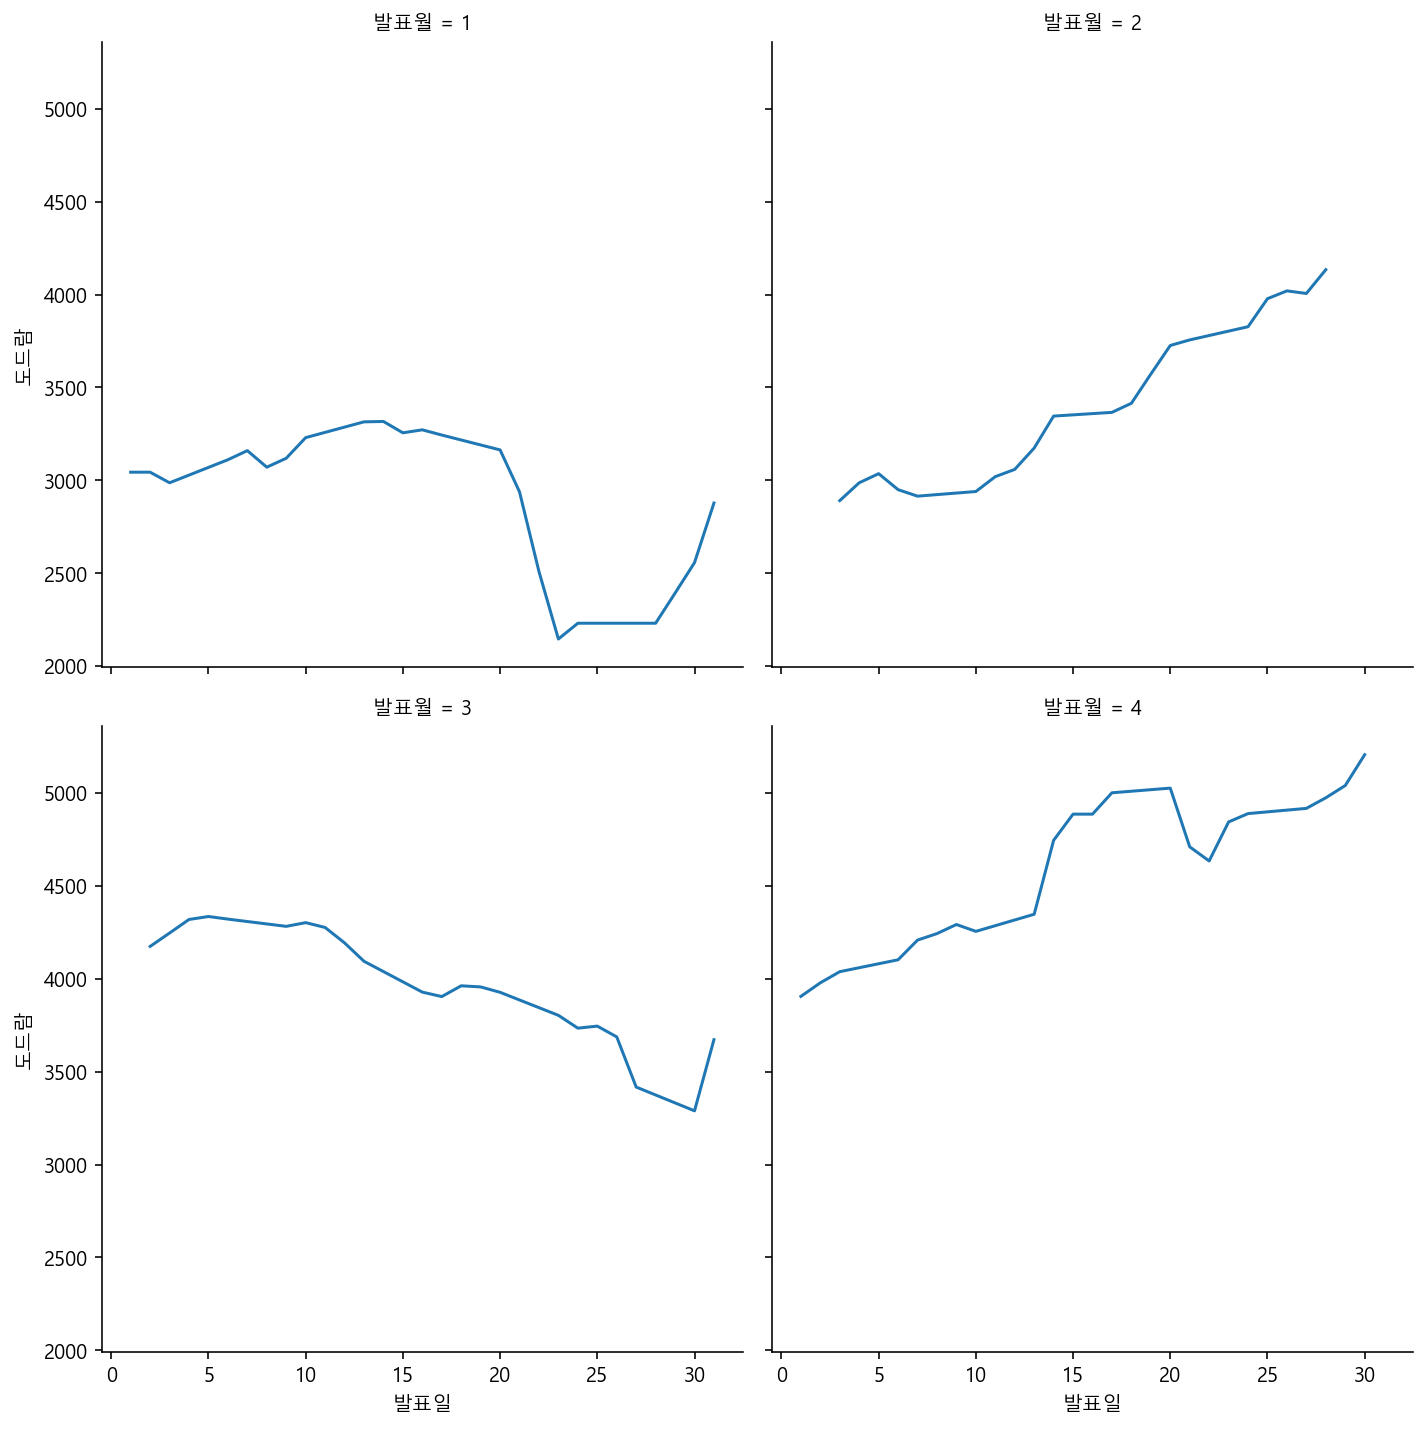

In [81]:
sns.relplot(data=df_raw[df_raw["발표월"]<5],x="발표일",y="도드람",col="발표월",col_wrap=2,kind="line")

In [91]:
df_raw["발표날짜"] = df_raw["발표일자"].map(lambda x : str(x).split('(')[0])

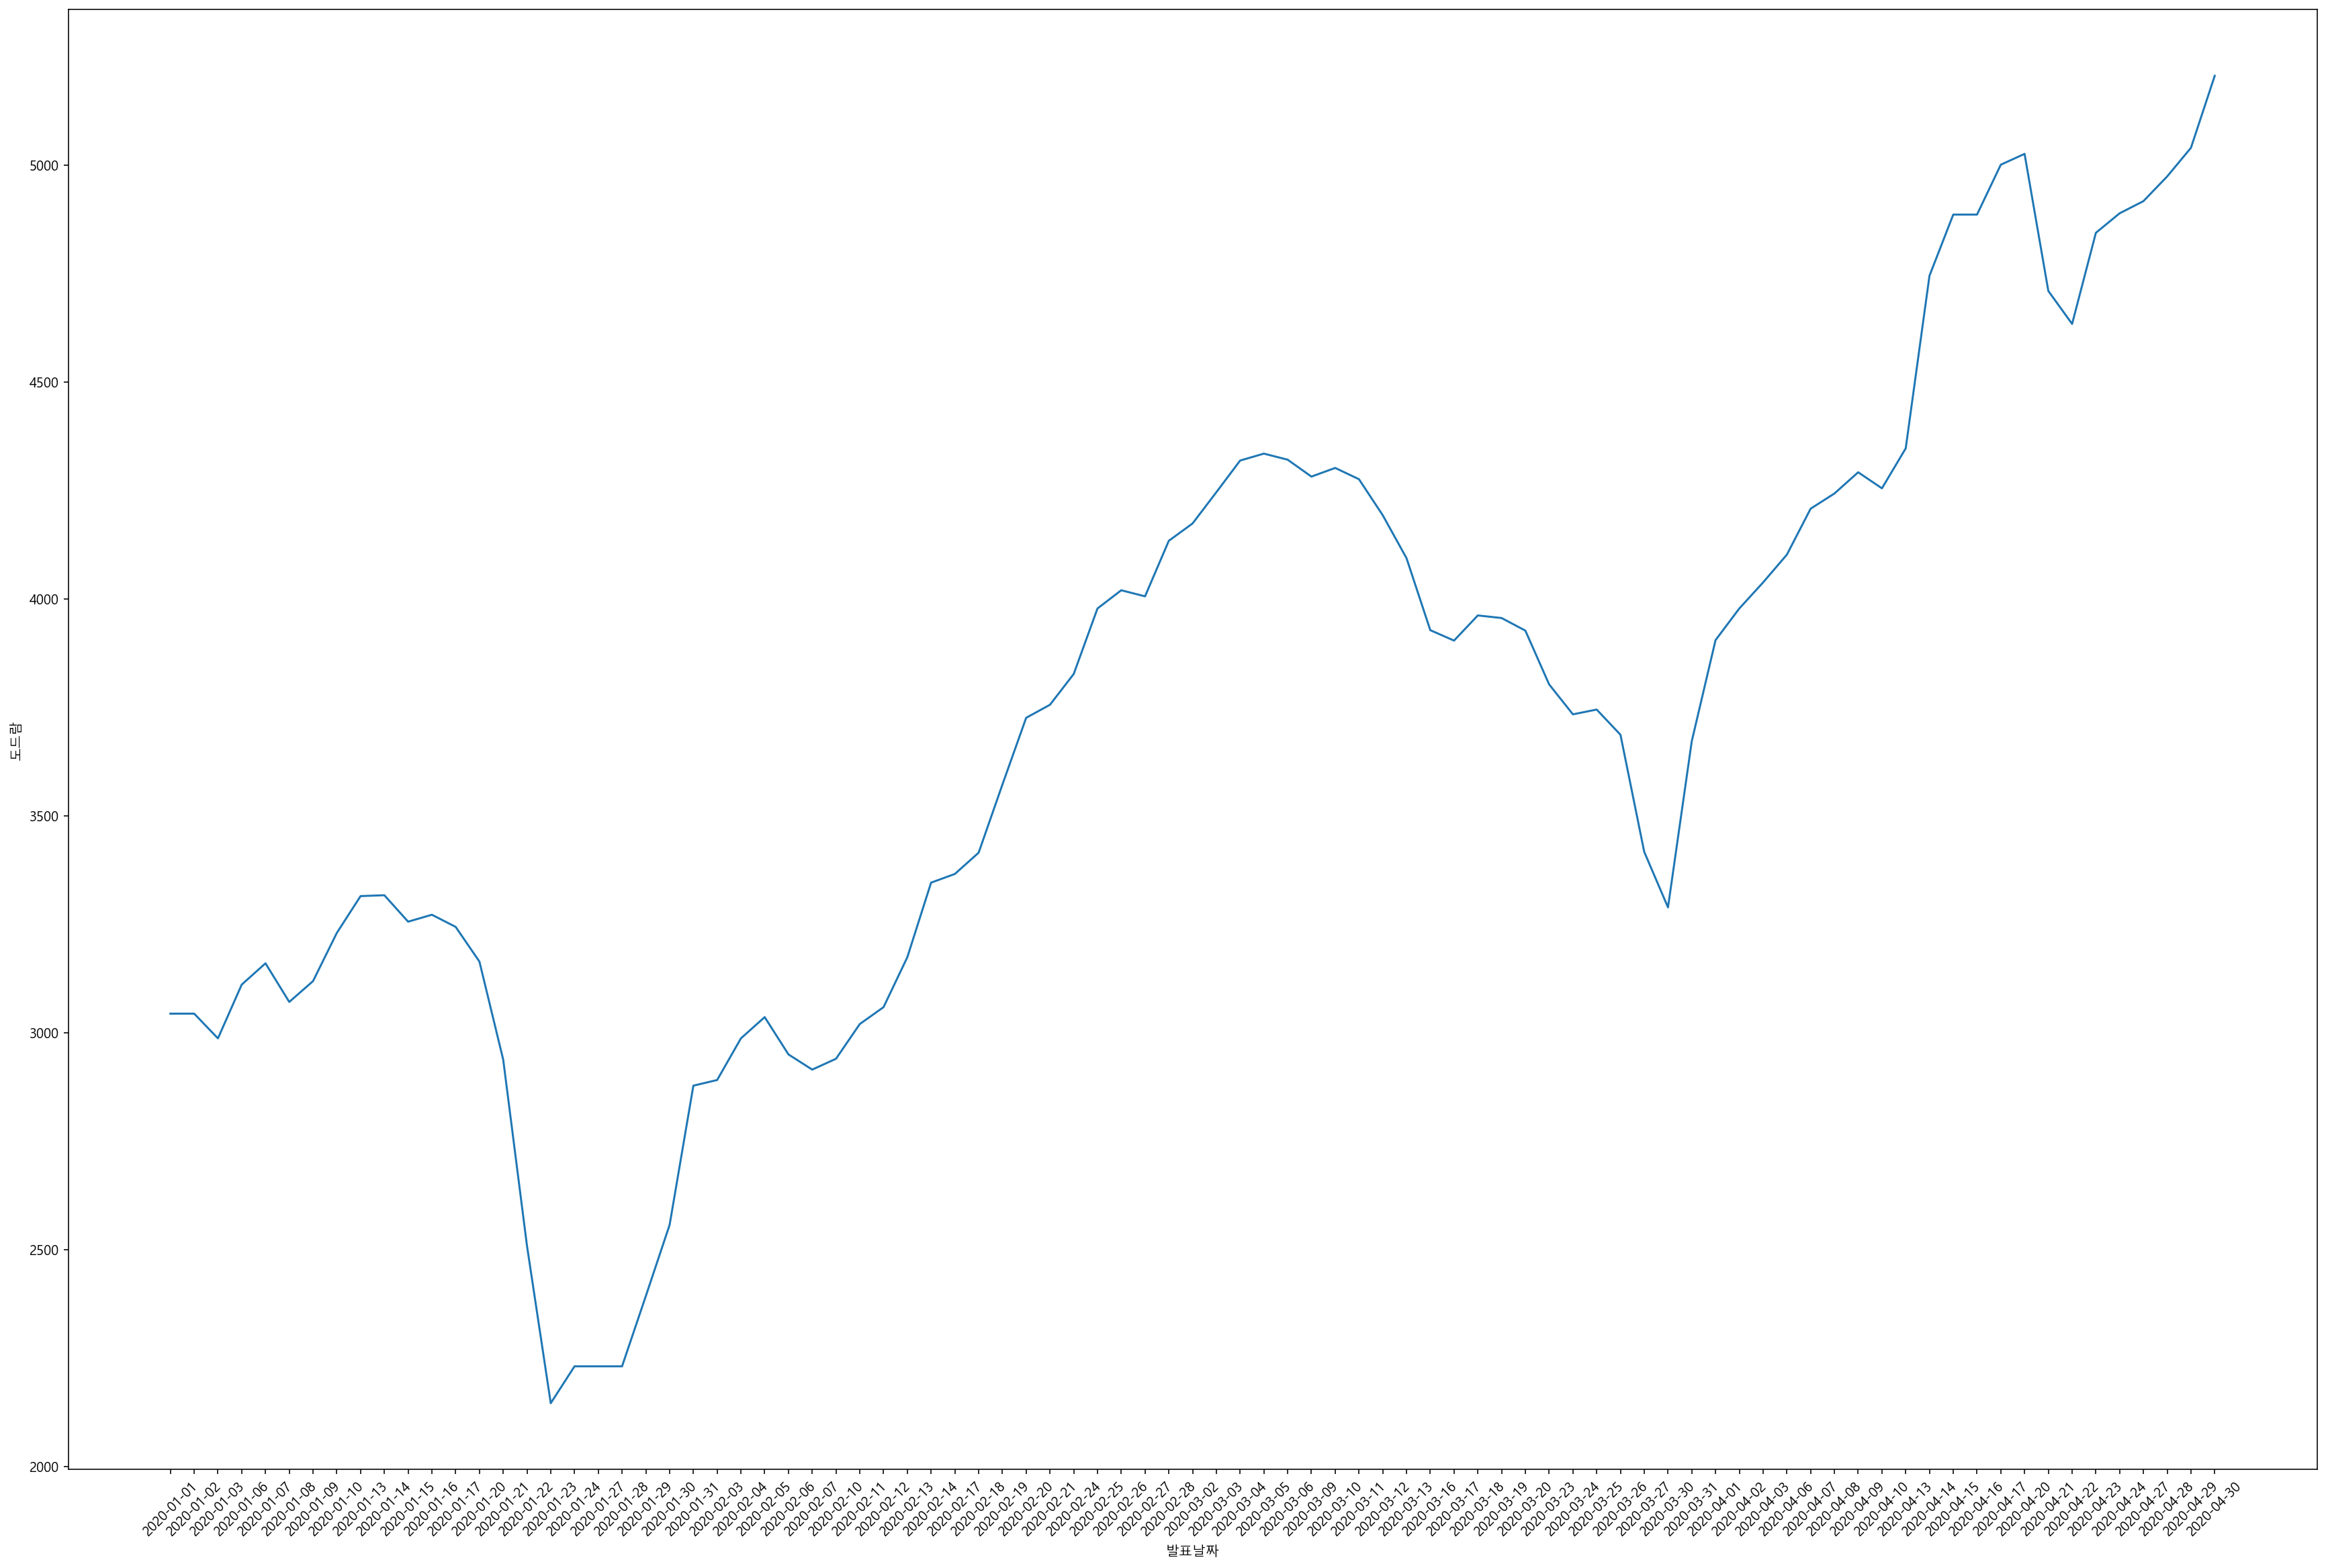

In [118]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=45)
sns.lineplot(data=df_raw[df_raw["발표월"]<5],x="발표날짜",y="도드람")
plt.savefig("도드람_가격변동.png")